**Aufgabe 29:**

Berechnen Sie die Lösung des Anfangswertproblems (4) auf dem Intervall $[0, 1]$ numerisch. Der Anfangswert $G$ soll die Funktion $g(x) := \exp(−30 (x − 1/2)^2)$ nodal approximieren, d.h. $G_i := g(i/N)$ für $i = 1, \ldots , N − 1$.

**a)** Sei die Ortsschrittweite $h$ gegeben. Berechnen Sie mit Hilfe von (3a), wie groß die Zeitschrittweite $\tau$ abhängig von $h$ maximal sein darf, damit das explizite Euler Verfahren zu exponentiell fallenden Lösungen führt.

**b)** Überprüfen Sie dieses Resultat numerisch. Testen Sie dafür das explizite Euler Verfahren für dieses Problem numerisch fur unterschiedliche Orts- und Zeitschrittweiten (z.B. $h = 2^{−1}, \ldots, 2^{−10}$, $\tau = 2^{−1}, \ldots, 2^{−10}$. Dazu können Sie z.B. $\| U_h(t) \|_\infty$ über eine gewisse Zeit $t \in [0, T]$ grafisch darstellen.

**c)** Testen Sie nun mit dem impliziten Euler Verfahren. Zur Lösung des linearen Gleichungssystem verwenden Sie bitte LU-Faktorisierung und Vorwärts-/Rückwärtssubstitution (z.B. in Python durch die Funktionen ``lu_factor`` und ``lu_solve`` der Bibliothek ``scipy.linalg``).

In [1]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
def explicit_Euler(f, y_0, t):

    """
        This function applies the explicit Euler-Method.
        f ..... right hand side
        y_0 ... initial value
        t ..... time frames
    """

    # dimension of problem
    n = len(y_0)

    # t_0, \ldots, t_N
    N = len(t) - 1

    # time steps (has length N)
    h = t[1::] - t[:-1:]

    # resulting approximation (stored in rows)
    y = np.zeros((N+1, n))
    y[0] = y_0

    for ell in range(N):
        y[ell+1] = y[ell] + h[ell] * f(t[ell], y[ell])

    return y

In [3]:
def M(h):

    N = int(1/h)
 
    a = np.ones(N-1) * (-2)
    b = np.ones(N-2)
    M = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)

    return M / h**2

In [4]:
g = lambda x: np.exp(-30 * (x - 1/2)**2)

In [5]:
p_min = 1
# p_max = 10
p_max = 8

h_array   = [2**(-p) for p in range(p_min, p_max+1)]
tau_array = [2**(-p) for p in range(p_min, p_max+1)]

T = 1

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.5

We should be rising, because ...
0.5 >= 0.25000000000000006


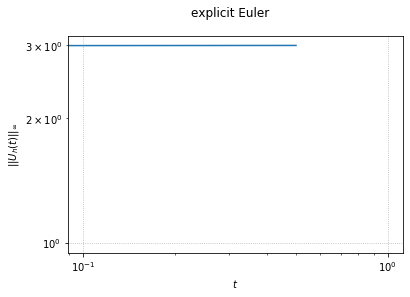

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.25

We should be falling, because ...
0.25 < 0.25000000000000006


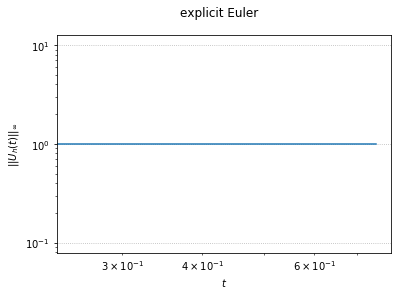

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.125

We should be falling, because ...
0.125 < 0.25000000000000006


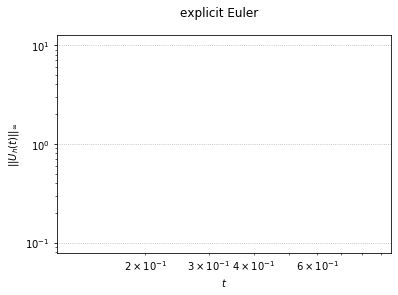

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.0625

We should be falling, because ...
0.0625 < 0.25000000000000006


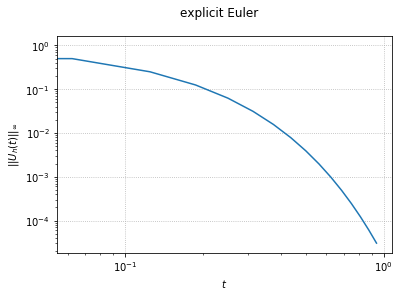

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.03125

We should be falling, because ...
0.03125 < 0.25000000000000006


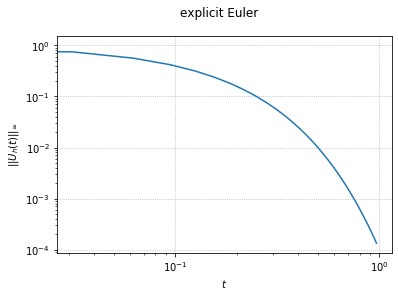

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.015625

We should be falling, because ...
0.015625 < 0.25000000000000006


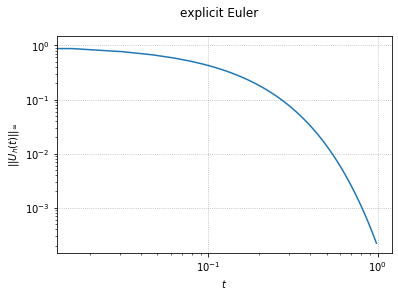

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.0078125

We should be falling, because ...
0.0078125 < 0.25000000000000006


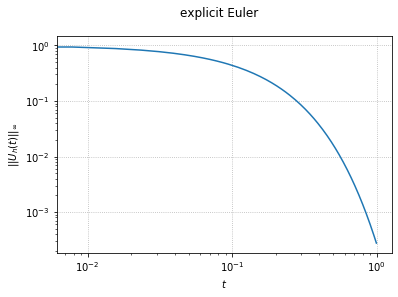

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.5
tau = 0.00390625

We should be falling, because ...
0.00390625 < 0.25000000000000006


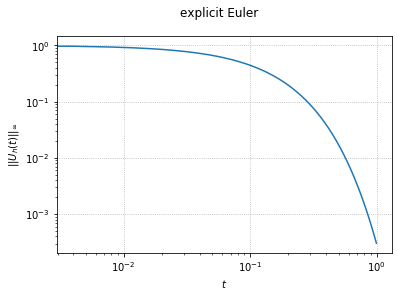

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.5

We should be rising, because ...
0.5 >= 0.03661165235168156


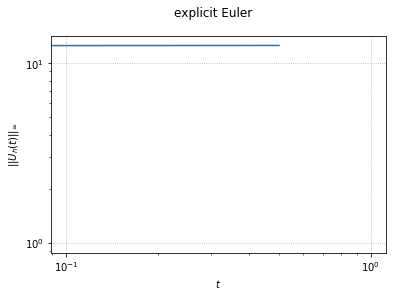

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.25

We should be rising, because ...
0.25 >= 0.03661165235168156


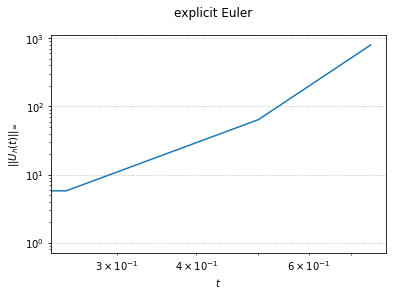

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.125

We should be rising, because ...
0.125 >= 0.03661165235168156


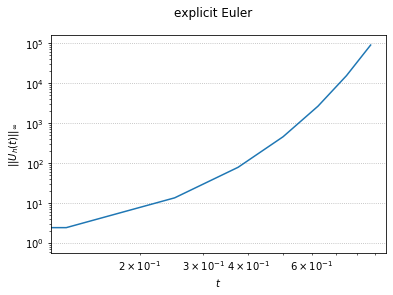

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.0625

We should be rising, because ...
0.0625 >= 0.03661165235168156


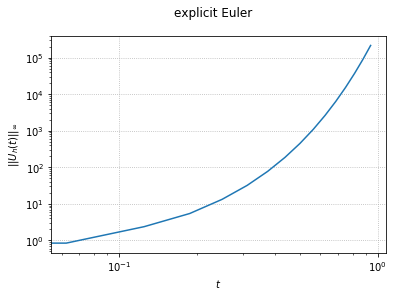

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.03125

We should be falling, because ...
0.03125 < 0.03661165235168156


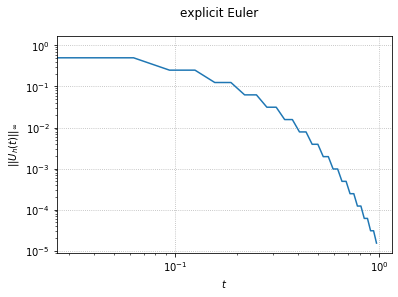

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.015625

We should be falling, because ...
0.015625 < 0.03661165235168156


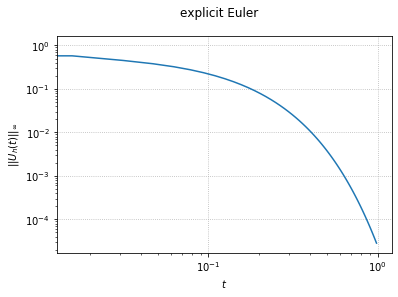

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.0078125

We should be falling, because ...
0.0078125 < 0.03661165235168156


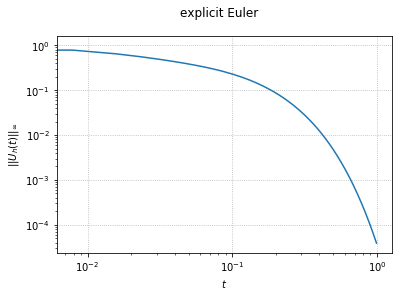

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.25
tau = 0.00390625

We should be falling, because ...
0.00390625 < 0.03661165235168156


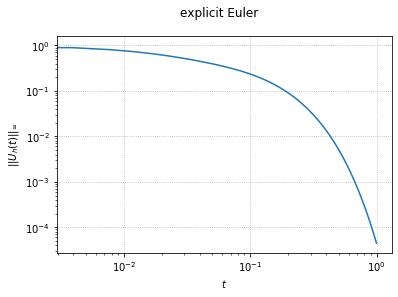

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.5

We should be rising, because ...
0.5 >= 0.008121610389817032


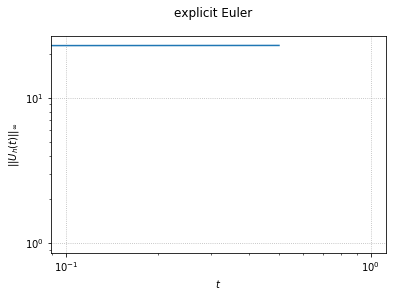

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.25

We should be rising, because ...
0.25 >= 0.008121610389817032


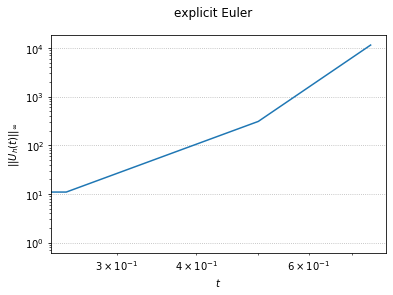

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.125

We should be rising, because ...
0.125 >= 0.008121610389817032


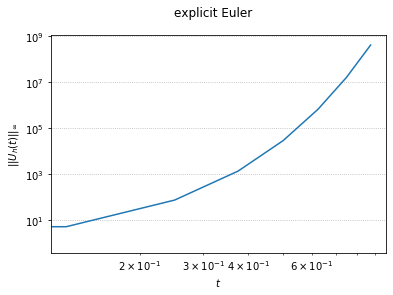

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.0625

We should be rising, because ...
0.0625 >= 0.008121610389817032


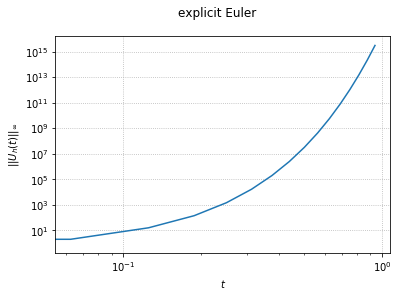

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.03125

We should be rising, because ...
0.03125 >= 0.008121610389817032


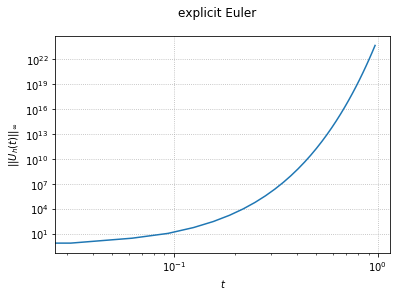

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.015625

We should be rising, because ...
0.015625 >= 0.008121610389817032


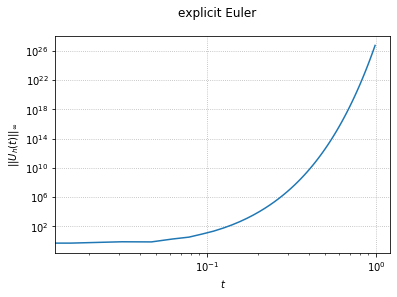

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.0078125

We should be falling, because ...
0.0078125 < 0.008121610389817032


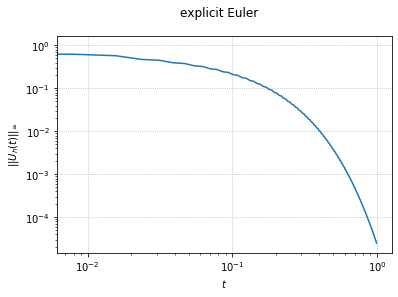

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.125
tau = 0.00390625

We should be falling, because ...
0.00390625 < 0.008121610389817032


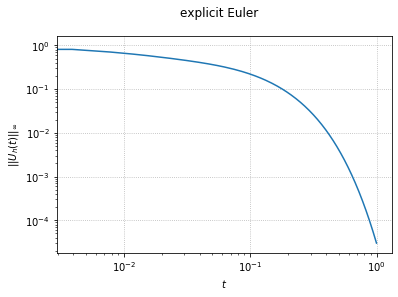

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.5

We should be rising, because ...
0.5 >= 0.001972071399482937


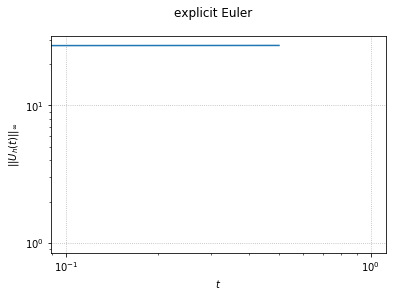

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.25

We should be rising, because ...
0.25 >= 0.001972071399482937


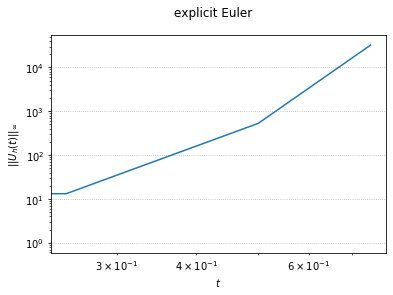

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.125

We should be rising, because ...
0.125 >= 0.001972071399482937


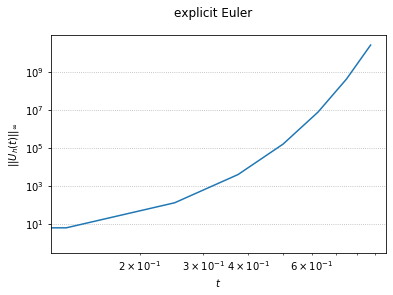

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.0625

We should be rising, because ...
0.0625 >= 0.001972071399482937


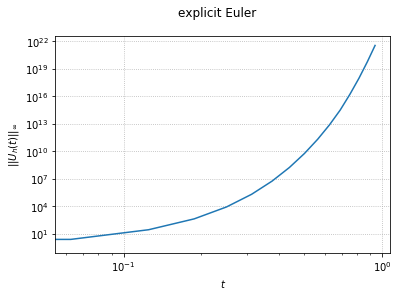

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.03125

We should be rising, because ...
0.03125 >= 0.001972071399482937


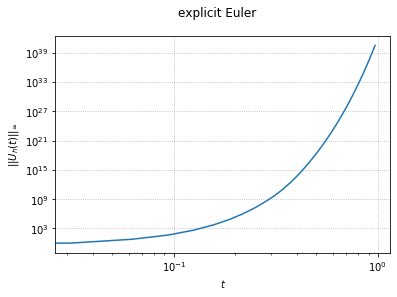

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.015625

We should be rising, because ...
0.015625 >= 0.001972071399482937


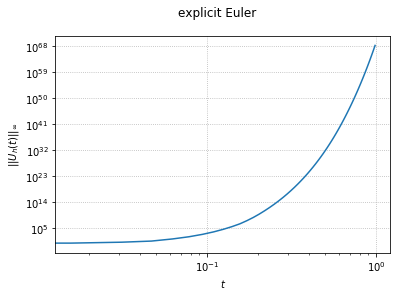

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.0078125

We should be rising, because ...
0.0078125 >= 0.001972071399482937


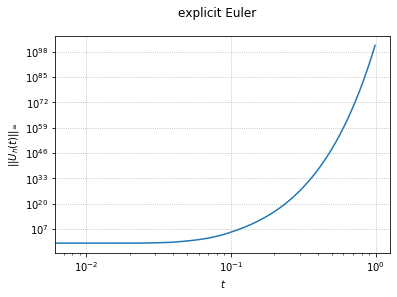

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0625
tau = 0.00390625

We should be rising, because ...
0.00390625 >= 0.001972071399482937


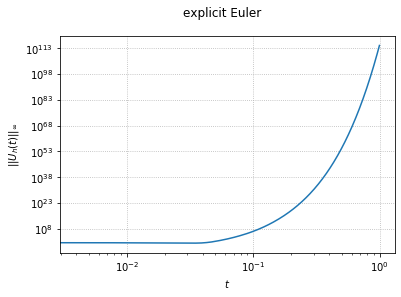

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.5

We should be rising, because ...
0.5 >= 0.000489459691097789


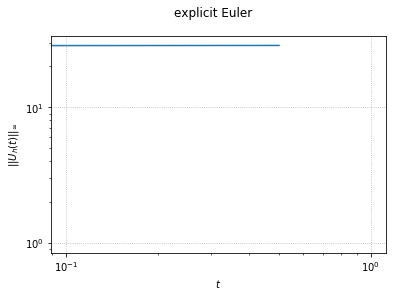

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.25

We should be rising, because ...
0.25 >= 0.000489459691097789


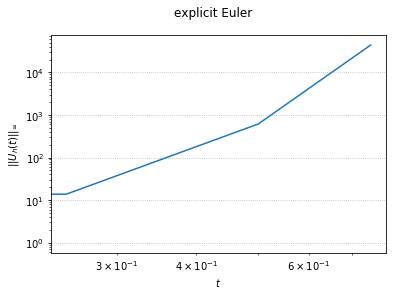

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.125

We should be rising, because ...
0.125 >= 0.000489459691097789


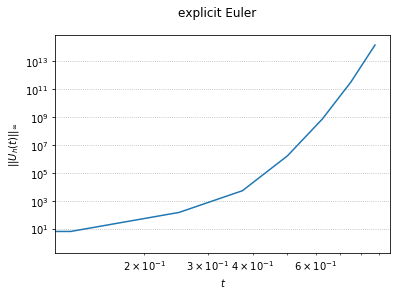

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.0625

We should be rising, because ...
0.0625 >= 0.000489459691097789


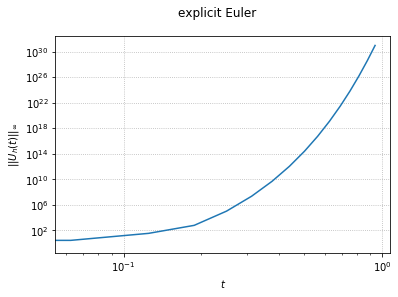

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.03125

We should be rising, because ...
0.03125 >= 0.000489459691097789


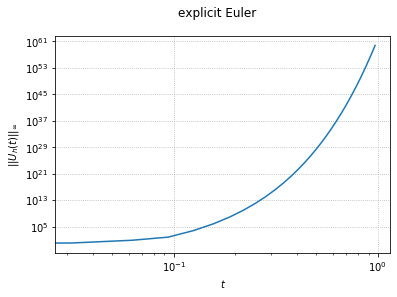

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.015625

We should be rising, because ...
0.015625 >= 0.000489459691097789


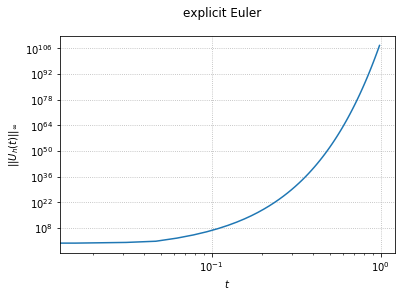

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.0078125

We should be rising, because ...
0.0078125 >= 0.000489459691097789


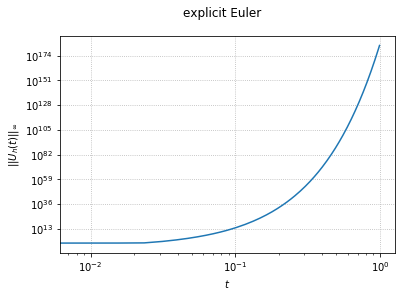

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.03125
tau = 0.00390625

We should be rising, because ...
0.00390625 >= 0.000489459691097789


C:\Users\richa\Anaconda3\lib\site-packages\numpy\ma\core.py:6666: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


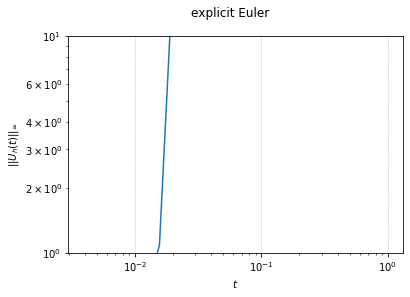

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.5

We should be rising, because ...
0.5 >= 0.00012214387632415122


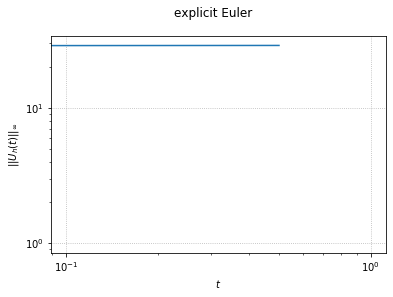

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.25

We should be rising, because ...
0.25 >= 0.00012214387632415122


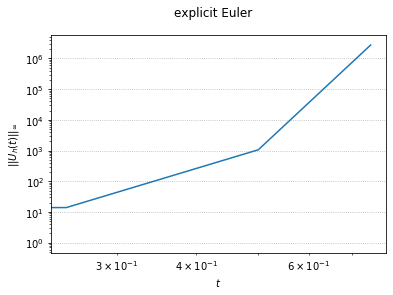

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.125

We should be rising, because ...
0.125 >= 0.00012214387632415122


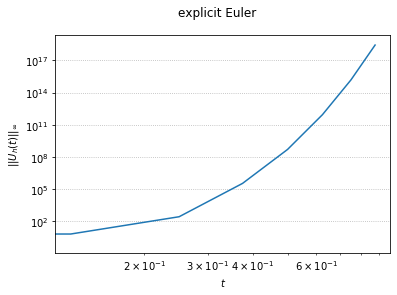

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.0625

We should be rising, because ...
0.0625 >= 0.00012214387632415122


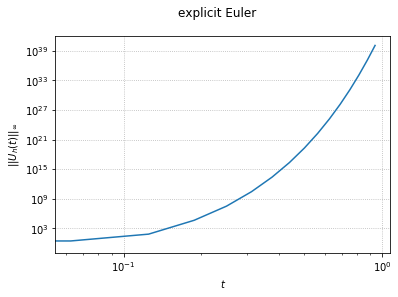

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.03125

We should be rising, because ...
0.03125 >= 0.00012214387632415122


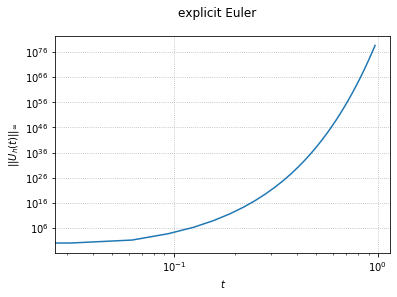

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.015625

We should be rising, because ...
0.015625 >= 0.00012214387632415122


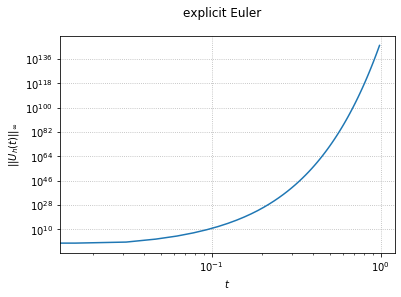

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.0078125

We should be rising, because ...
0.0078125 >= 0.00012214387632415122


C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\ticker.py:2349: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\ticker.py:2197: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < 1e-10
C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\ticker.py:1120: RuntimeWarning: invalid value encountered in double_scalars
  coeff = np.round(x / b ** exponent)


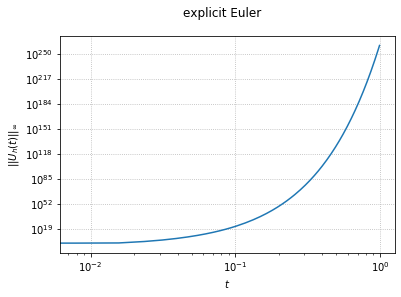

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.015625
tau = 0.00390625

We should be rising, because ...
0.00390625 >= 0.00012214387632415122


C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in matmul
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in matmul


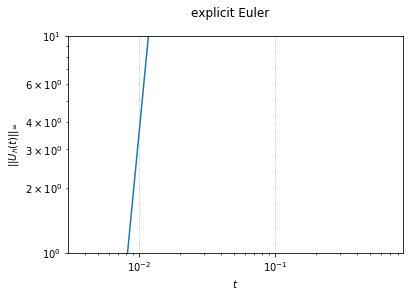

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.5

We should be rising, because ...
0.5 >= 3.052217447915216e-05


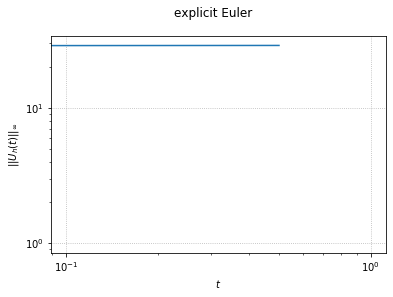

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.25

We should be rising, because ...
0.25 >= 3.052217447915216e-05


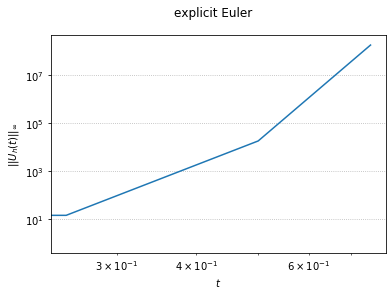

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.125

We should be rising, because ...
0.125 >= 3.052217447915216e-05


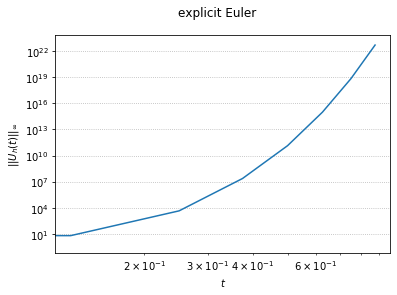

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.0625

We should be rising, because ...
0.0625 >= 3.052217447915216e-05


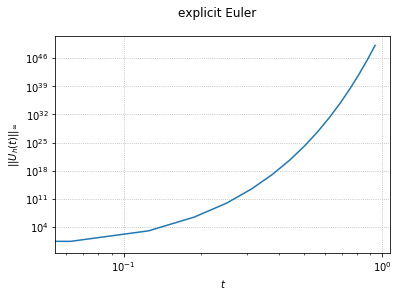

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.03125

We should be rising, because ...
0.03125 >= 3.052217447915216e-05


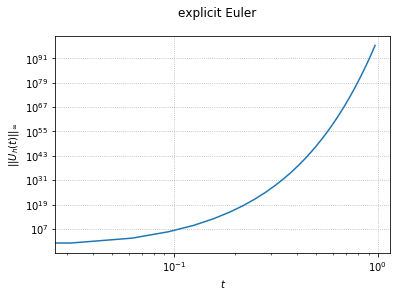

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.015625

We should be rising, because ...
0.015625 >= 3.052217447915216e-05


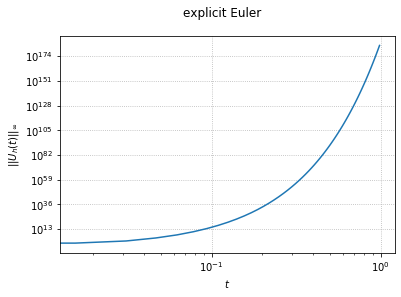

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.0078125

We should be rising, because ...
0.0078125 >= 3.052217447915216e-05


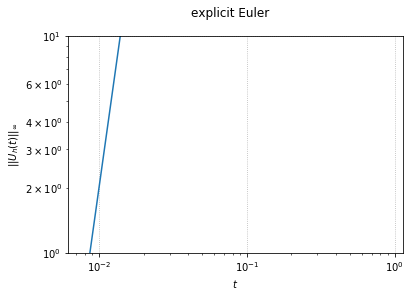

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.0078125
tau = 0.00390625

We should be rising, because ...
0.00390625 >= 3.052217447915216e-05


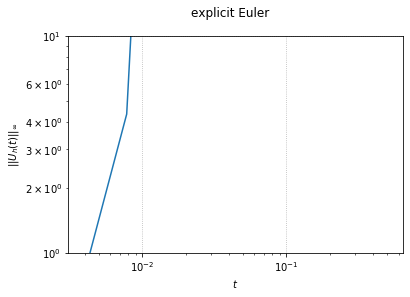

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.5

We should be rising, because ...
0.5 >= 7.629681781753038e-06


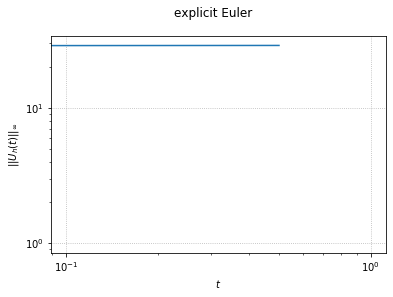

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.25

We should be rising, because ...
0.25 >= 7.629681781753038e-06


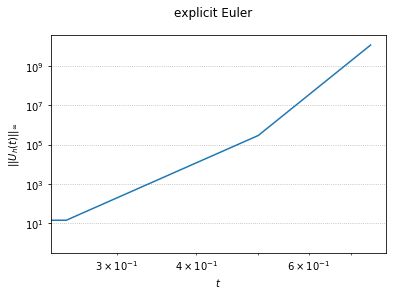

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.125

We should be rising, because ...
0.125 >= 7.629681781753038e-06


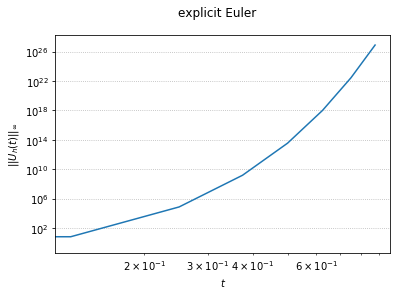

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.0625

We should be rising, because ...
0.0625 >= 7.629681781753038e-06


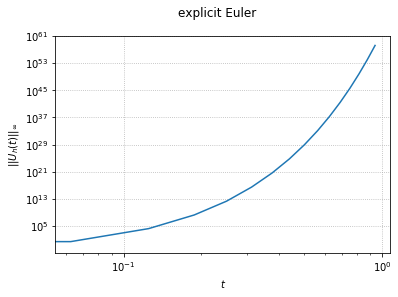

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.03125

We should be rising, because ...
0.03125 >= 7.629681781753038e-06


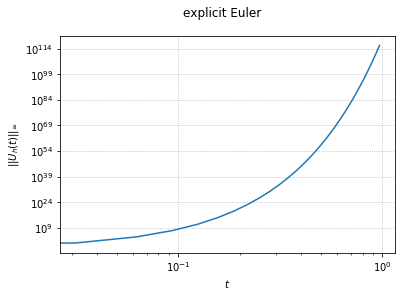

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.015625

We should be rising, because ...
0.015625 >= 7.629681781753038e-06


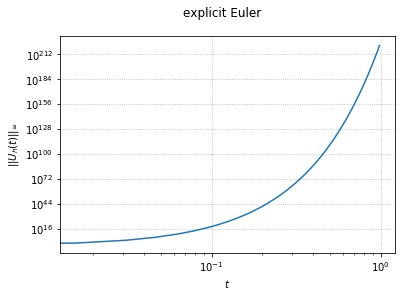

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.0078125

We should be rising, because ...
0.0078125 >= 7.629681781753038e-06


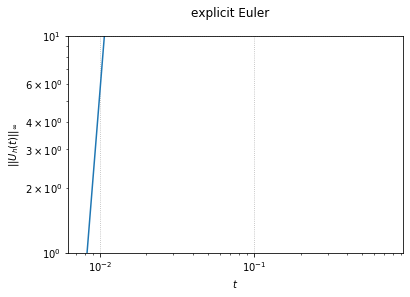

# ---------------------------------------------------------------- # 

Executing explicit Euler with ...
h   = 0.00390625
tau = 0.00390625

We should be rising, because ...
0.00390625 >= 7.629681781753038e-06


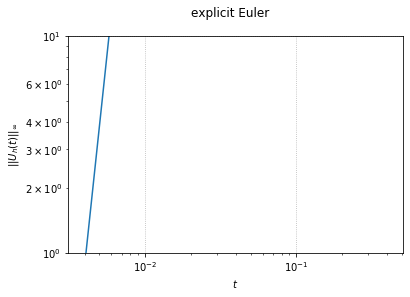

# ---------------------------------------------------------------- # 

This whole operation ... 

h_array =
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

tau_array =
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

... took 25.439422699999998 seconds!


In [6]:
start = timer()

print('#', '-'*64, '#', '\n')

for h in h_array:

    for tau in tau_array:

        print("Executing explicit Euler with ...")
        print("h   =", h)
        print("tau =", tau)
        print("")

        N = int(1/h)

        border = h**2 / (1 - np.cos((N-1) * np.pi / N))

        if tau < border:
            print("We should be falling, because ...")
            print(tau, '<', border)
        else:
            print("We should be rising, because ...")
            print(tau, '>=', border)

        # right hand side
        f = lambda t_, y_: M(h) @ y_

        # initial value
        Delta = np.array([i/N for i in range(1, N)])
        y_0 = G = g(Delta)

        # time frames
        t = np.arange(0, T, tau)

        y = explicit_Euler(f, y_0, t)

        y_maximums = np.array([max(abs(y_row)) for y_row in y])

        fig = plt.plot()

        plt.loglog(t, y_maximums)
        plt.xlabel("$t$")
        plt.ylabel("$|| U_h(t) ||_\infty$")
        plt.suptitle("explicit Euler")
        plt.grid(linestyle = ':')
        plt.show()

        print('#', '-'*64, '#', '\n')

end = timer()
print("This whole operation ...", '\n')

print("h_array =")
print(h_array)
print("")

print("tau_array =")
print(tau_array)
print("")

print("... took", end - start, "seconds!")

In [7]:
def implicit_Euler_special(M, y_0, t):

    """
        This function applies the implicit Euler-Method
        to a linear homogeneous ODE with constant coefficient matrix,
        i.e. right hand side $f: (t, y) \mapsto M y$.
        M ..... matrix for right hand side
        y_0 ... initial value
        t ..... time frames
    """

    # dimension of problem
    n = len(y_0)

    # t_0, \ldots, t_N
    N = len(t) - 1

    # time steps (has length N)
    h = t[1::] - t[:-1:]

    # resulting approximation (stored in rows)
    y = np.zeros((N+1, n))
    y[0] = y_0

    I = np.identity(n)
    LU = lu_factor(I - tau*M)

    for ell in range(N):
        y[ell+1] = lu_solve(LU, y[ell])

    return y

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.5



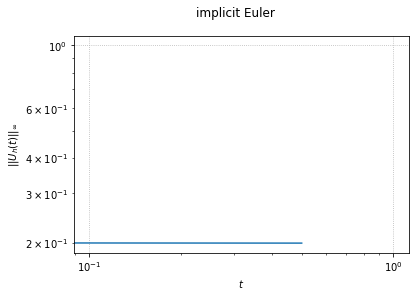

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.25



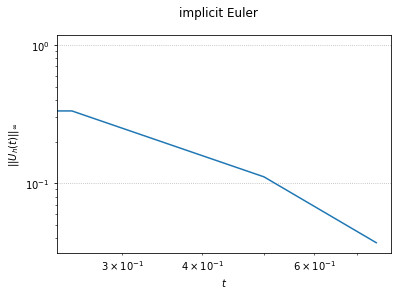

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.125



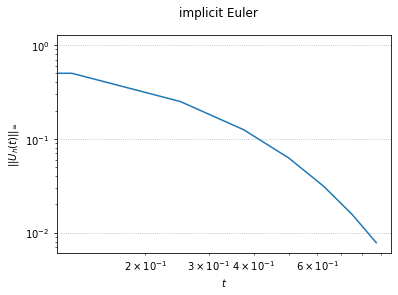

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.0625



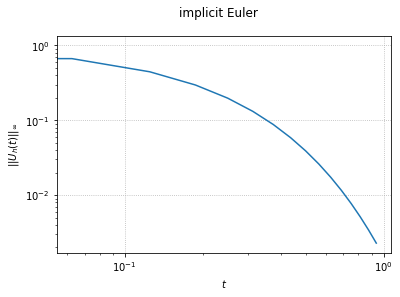

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.03125



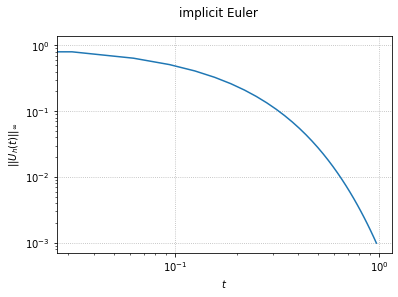

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.015625



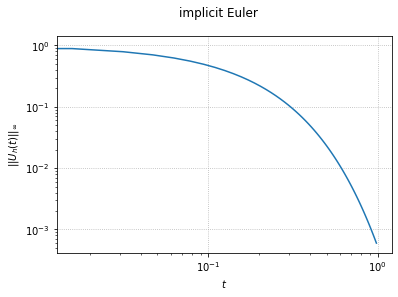

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.0078125



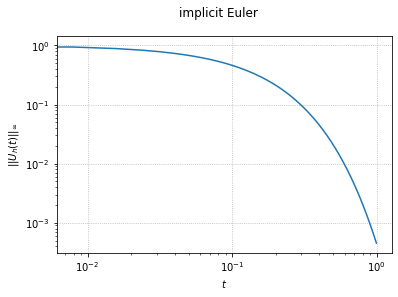

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.5
tau = 0.00390625



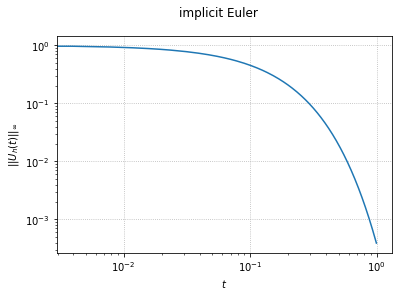

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.5



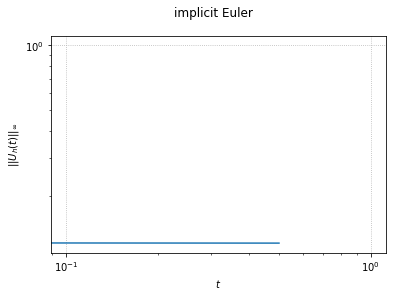

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.25



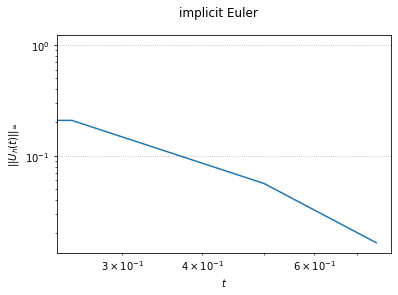

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.125



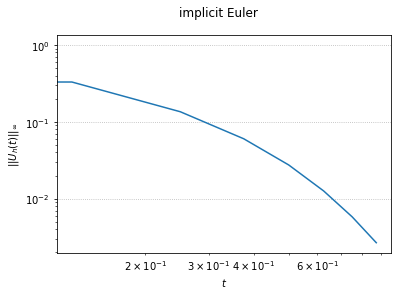

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.0625



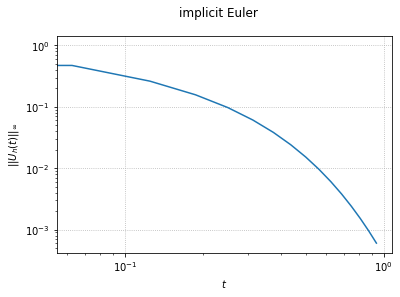

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.03125



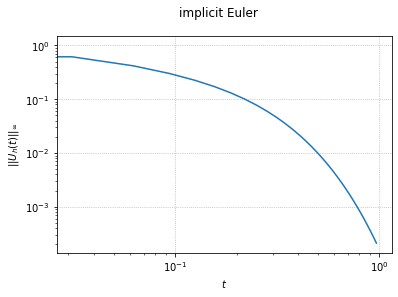

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.015625



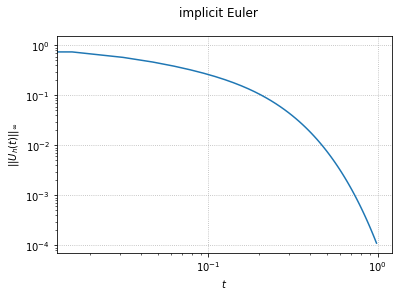

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.0078125



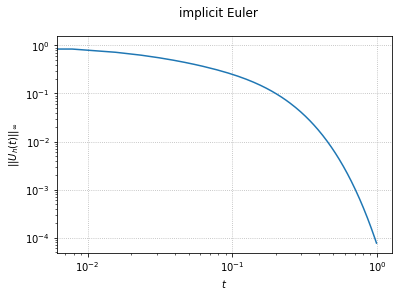

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.25
tau = 0.00390625



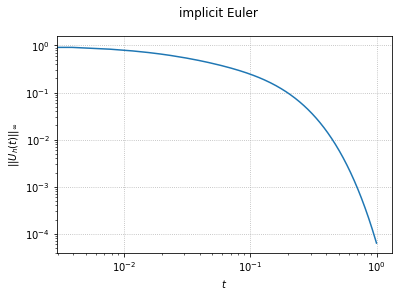

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.5



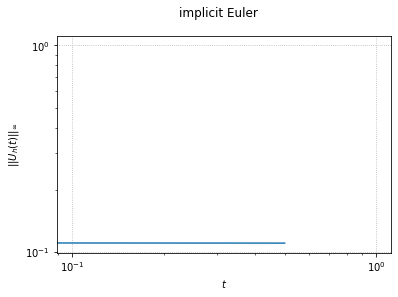

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.25



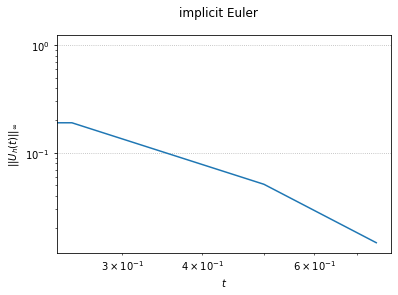

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.125



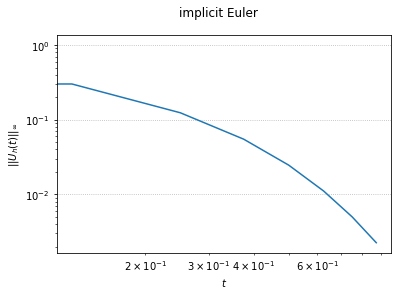

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.0625



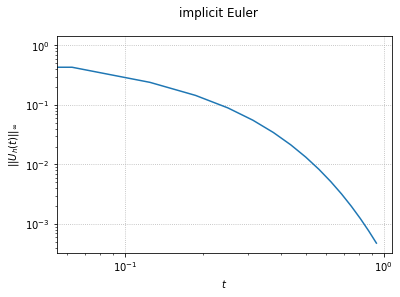

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.03125



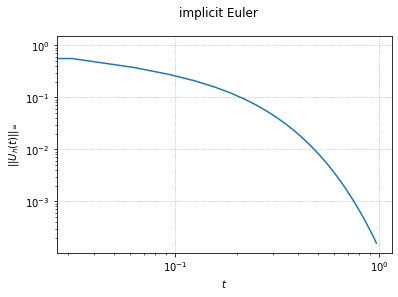

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.015625



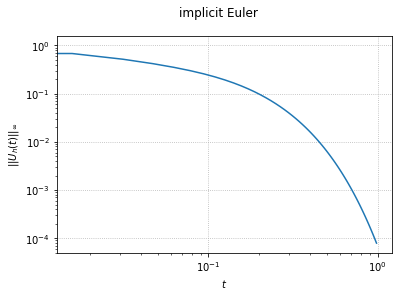

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.0078125



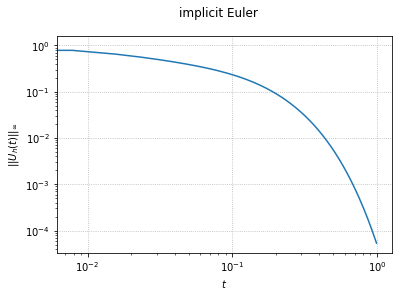

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.125
tau = 0.00390625



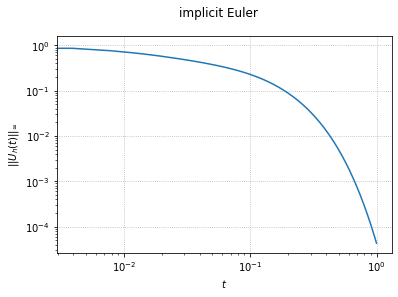

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.5



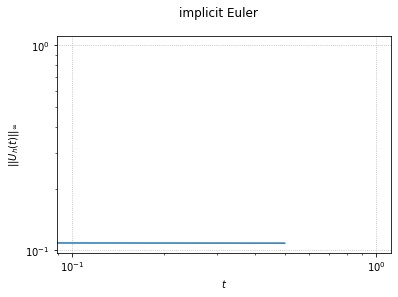

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.25



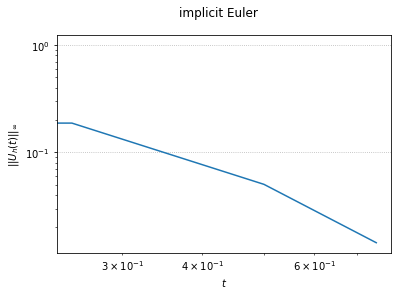

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.125



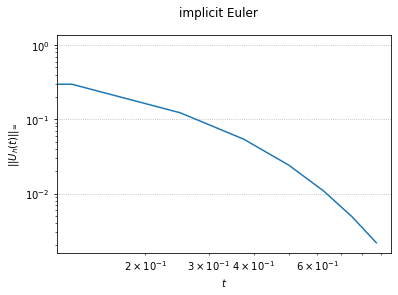

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.0625



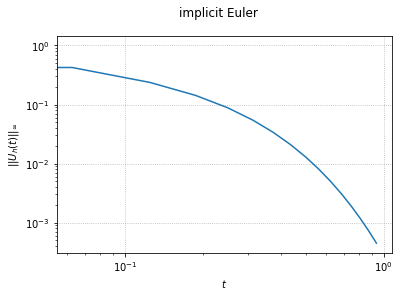

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.03125



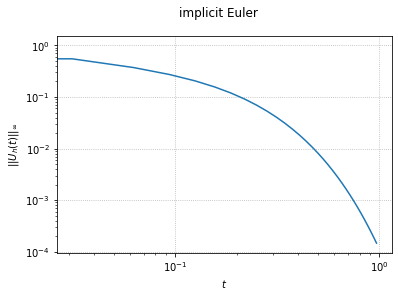

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.015625



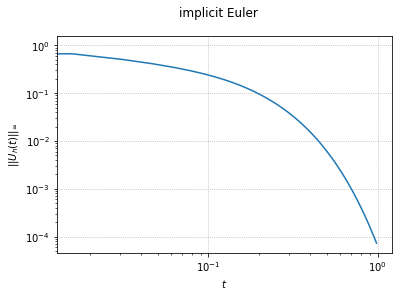

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.0078125



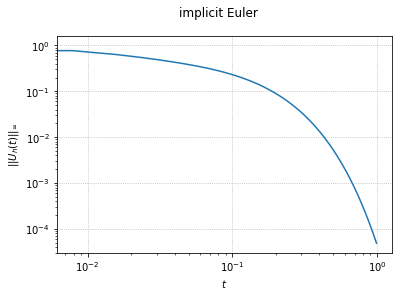

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0625
tau = 0.00390625



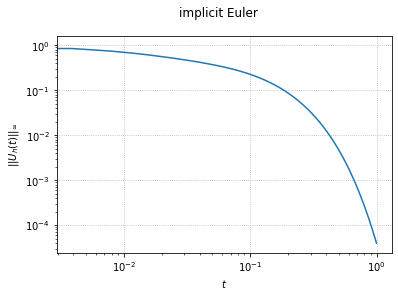

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.5



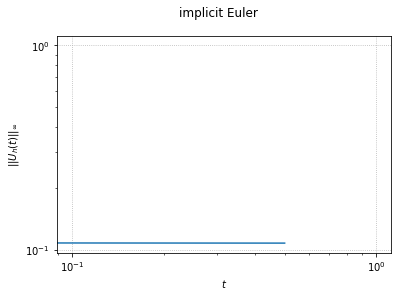

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.25



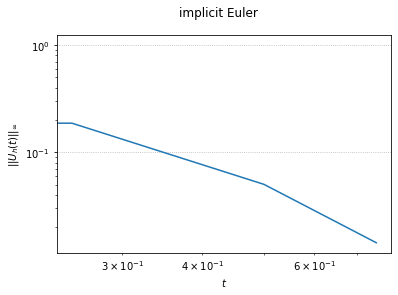

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.125



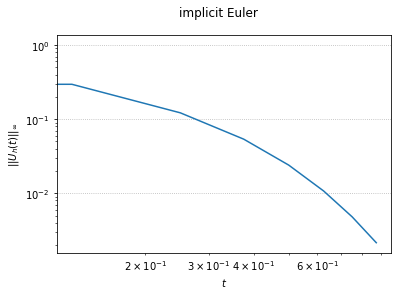

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.0625



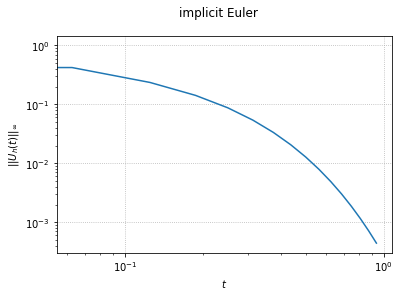

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.03125



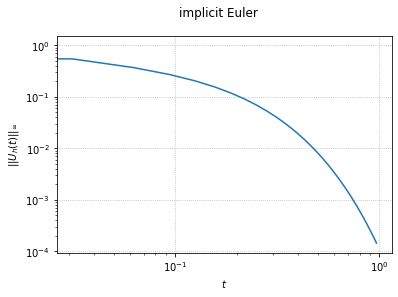

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.015625



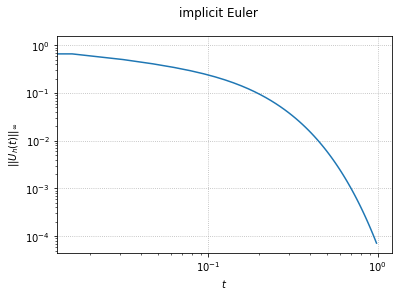

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.0078125



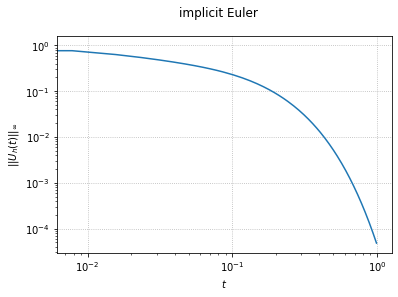

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.03125
tau = 0.00390625



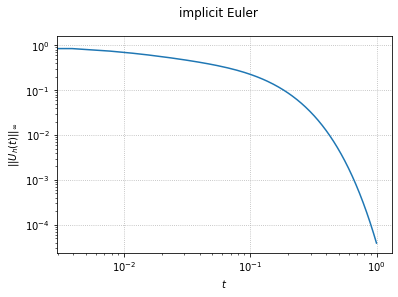

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.5



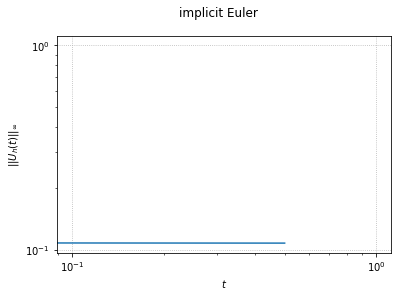

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.25



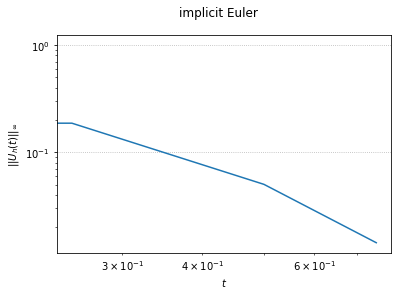

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.125



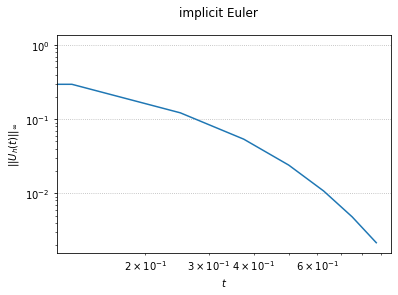

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.0625



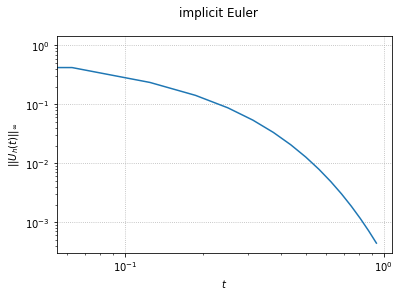

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.03125



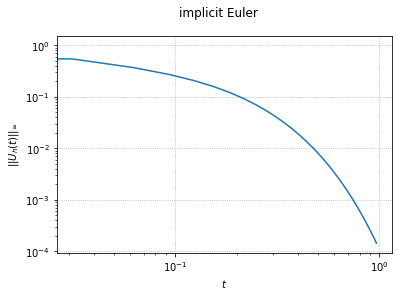

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.015625



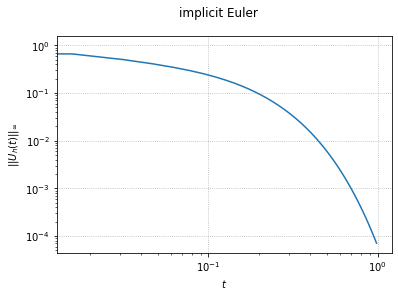

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.0078125



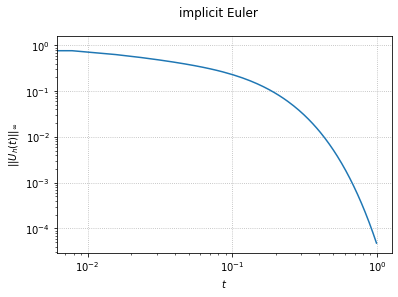

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.015625
tau = 0.00390625



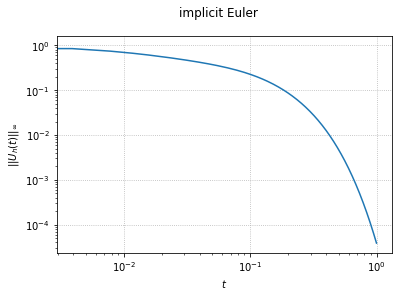

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.5



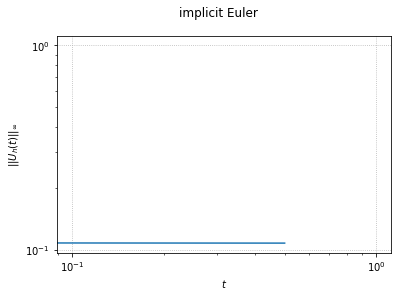

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.25



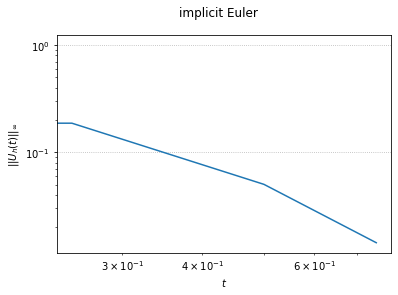

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.125



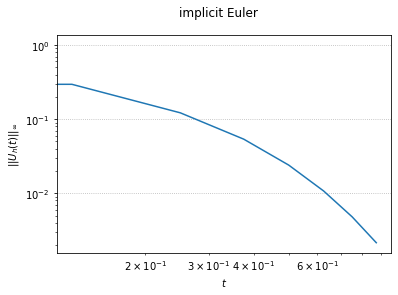

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.0625



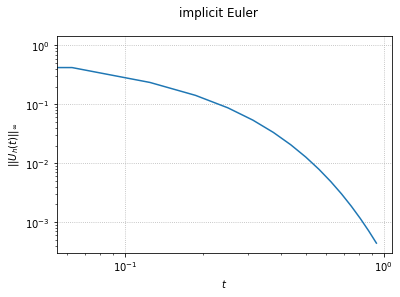

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.03125



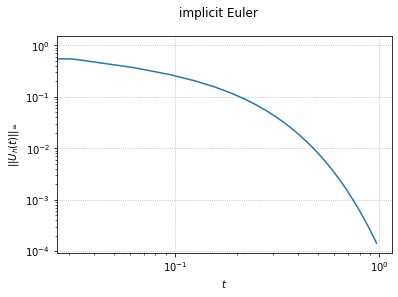

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.015625



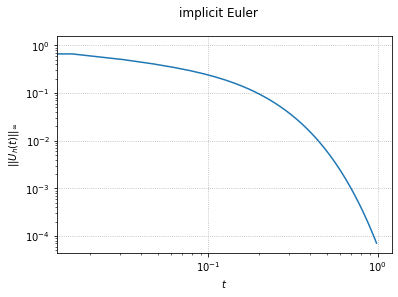

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.0078125



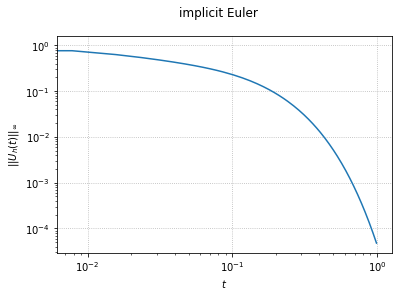

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.0078125
tau = 0.00390625



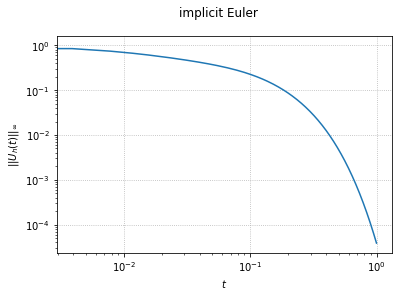

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.5



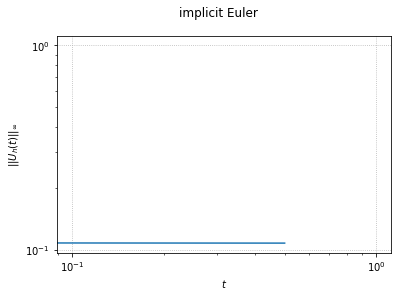

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.25



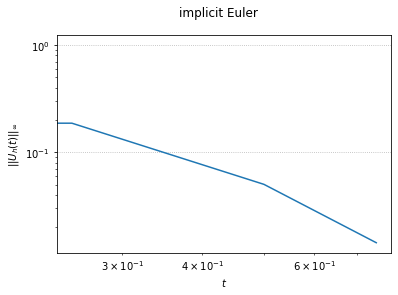

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.125



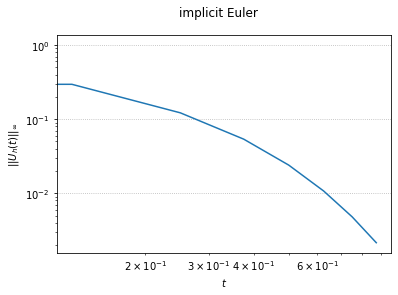

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.0625



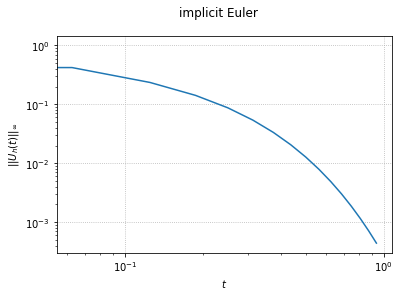

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.03125



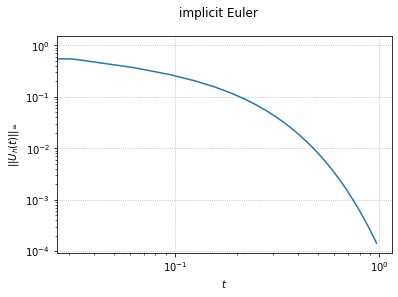

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.015625



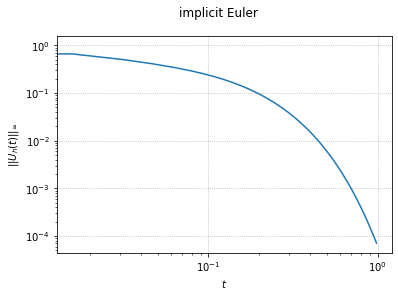

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.0078125



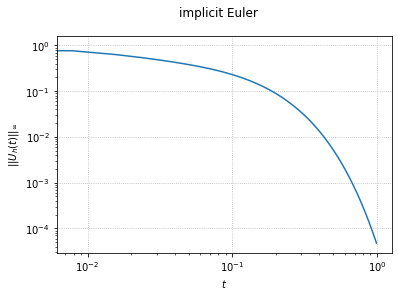

# ---------------------------------------------------------------- # 

Executing implicit Euler with ...
h   = 0.00390625
tau = 0.00390625



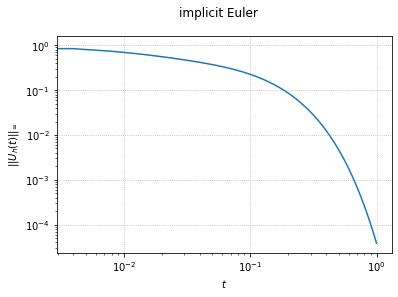

# ---------------------------------------------------------------- # 

This whole operation ... 

h_array =
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

tau_array =
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

... took 24.471337 seconds!


In [8]:
start = timer()

print('#', '-'*64, '#', '\n')

for h in h_array:

    for tau in tau_array:

        print("Executing implicit Euler with ...")
        print("h   =", h)
        print("tau =", tau)
        print("")

        N = int(1/h)

        # initial value
        Delta = np.array([i/N for i in range(1, N)])
        y_0 = G = g(Delta)

        # time frames
        t = np.arange(0, T, tau)

        y = implicit_Euler_special(M(h), y_0, t)

        y_maximums = np.array([max(abs(y_row)) for y_row in y])

        fig = plt.plot()

        plt.loglog(t, y_maximums)
        plt.xlabel("$t$")
        plt.ylabel("$|| U_h(t) ||_\infty$")
        plt.suptitle("implicit Euler")
        plt.grid(linestyle = ':')
        plt.show()

        print('#', '-'*64, '#', '\n')

end = timer()
print("This whole operation ...", '\n')

print("h_array =")
print(h_array)
print("")

print("tau_array =")
print(tau_array)
print("")

print("... took", end - start, "seconds!")